##### <center>**CMPINF 0010 - Group 36 Final Project**</center>
## <center>**What is the Least Depressing Neighborhood in Pittsburgh?**</center>

##### **The Project**
The aim of this project is to quantitatively determine the Pittsburgh neighborhood that is the least depressing to live in. To achieve this, we will be providing a clearly defined metric that we believe may indicate this quality in a neighborhood. The metric will be quantitative in nature and will be sourced from the **Western Pennsylvania Regional Data Center (WPRDC)**.
Our approach is to pick three submetrics from the **WPRDC**, each of which we believe to have significance in our definition of *least depressing*, given below. We will analyze the submetrics individually, as well as considered together, to arrive at a verdict for overall least-depressiveness.

##### **The Metric**
We quantitatively define the "least depressing neighborhood" as the neighborhood that:
<br>
* `contains or has easy access to the largest number of city parks;`
<br>
* `has the lowest lifetime number of police arrests;`
<br>
* and `has the highest rates of community center attendance.`

##### **Coming Up with the Metric**
Our process of arriving at our decided metric was sophisticated. We threw around a handful of spontaneous ideas--most of which were not put to paper and thus unable to be recalled--until we found one we both seemed to be okay with--the "least depressing" metric for determining the best neighborhood.
<br>
Afterwards, we combed through the WPRDC website for available datasets that were also well-structured and thus not a hassle to analyze.
<br>
Out of the approximately nine suitable datasets, namely
* no. of trees
* no. of signalized intersections
* no. of city parks
* community center attendance
* no. of smart trash containers
* no. of playground
* no. of bridges (this one might cut across neighborhoods)
* no. of retaining walls
* no. of water features (fountains, etc.),

we settled on the current three that became our three submetrics that we will be analyzing individually and in tandem to fulfill our main metric.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### **City Parks**

Parks! This is the first sub-metric. Who doesn't love parks? You can go inside them, look around them, frolick in them, walk your pet or yourself in them, and more. Parks typically are expected to contain plenty of greenery and open, relaxing spaces that fit outdoor recreation like a glove. Human brains are still very much primitive; spending time surrounded by natural greenery is good for us whether we think we like it or not. Therefore, it is an undeniable fact of our ape brains that more parks means more greenery which means more happiness. From this we can dervie with simple inverse correlation that more parks equates to a less depressing place to live. Let us see which neighborhoods are the most equipped with these parks.

I love reading. Let's read the file.

In [7]:
parks = pd.read_csv("city-parks.csv")
parks.head(3)

,_id,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017


See now, I love reading, but not the things I don't need. Let us filter out the columns that we won't be needing.

In [21]:
parks[["name", "type", "neighborhood"]].head(5)

,name,type,neighborhood
0,Able Long Park,Park,Beechview
1,Albert Turk Graham Park,Park,Crawford-Roberts
2,Alcoa Park,Park,North Shore
3,Allegheny Commons,Park,Allegheny Center
4,Allegheny Landing Park,Park,North Shore


Much better.

First, let us sort by `neighborhood` so we can easily count how many there are in each. Since parks are places, and a place can't be in two places at the same time, we only need to count the number of unique park names for each `neighborhood` to determine the amount in each. We can ignore the parks' `type` for the moment.

In [235]:
parks[["name", "neighborhood"]].groupby("neighborhood").count()

,name
neighborhood,
Allegheny Center,2
Allentown,2
Arlington,1
Banksville,2
Bedford Dwellings,1
...,...
Upper Lawrenceville,3
West End,2
West Oakland,1


Now, we want to sort this so the winner gets to go on top. The simplest way to do this is to use the `sort_values()` function. Watch out! Don't forget to specify the argument to sort by descending!

In [237]:
parksDF = parks[["name", "neighborhood"]].groupby("neighborhood").count().sort_values(by="name", ascending=False)
parksDF

,name
neighborhood,
East Liberty,12
Central Business District,10
Beechview,8
Point Breeze,7
South Side Slopes,7
...,...
Homewood West,1
Oakwood,1
Middle Hill,1


Now that is really nice, but since the type of park was easily made available for us, it is best we make some use of it. Five types are present, namely `Park`, `Traffic Island/Median`, `Monument/Memorial`, `Open Space`, and `Building Grounds`. Based on the typical size expected of each of these types--all of which are only estimates based on the *feel* I get from Google images--we apply a multiplier to adjust for their (expected) size differences relative to the largest type (`Park`) as well as the expected amount of greenery and nature.

In [242]:
weights = {"Park":1.0,
               "Traffic Island/Median":0.1,
              "Monument/Memorial":0.4,
              "Open Space":0.1,
              "Building Grounds":0.2}

Now, we iterate through each park to note its type and indicate the amount of each present for each neighborhood.

In [243]:
parksDF = parks[["name", "neighborhood"]].groupby("neighborhood").count().sort_values(by="name", ascending=False)

typeSeries = parks[["type", "neighborhood"]].loc[:, "type"]
neighborhoodSeries = parks[["type", "neighborhood"]].loc[:, "neighborhood"]

types = ["Park", "Traffic Island/Median", "Monument/Memorial", "Open Space", "Building Grounds"]

for i in range(len(typeSeries)):
    
    #create column if it doesn't exist
    if typeSeries[i] not in parksDF.columns:
        parksDF[typeSeries[i]] = 0
    
    parksDF.loc[neighborhoodSeries[i], typeSeries[i]] += 1
parksDF

,name,Park,Traffic Island/Median,Building Grounds,Monument/Memorial,Open Space
neighborhood,,,,,,
East Liberty,12,4,8,0,0,0
Central Business District,10,3,5,0,0,2
Beechview,8,6,1,0,1,0
Point Breeze,7,1,6,0,0,0
South Side Slopes,7,6,0,1,0,0
...,...,...,...,...,...,...
Homewood West,1,1,0,0,0,0
Oakwood,1,1,0,0,0,0
Middle Hill,1,1,0,0,0,0


Now we just apply the weights and sum them again.

In [244]:
parksDF["score"] = (parksDF["Park"]*weights["Park"] +
                    parksDF["Traffic Island/Median"]*weights["Traffic Island/Median"] +
                    parksDF["Building Grounds"]*weights["Building Grounds"] +
                    parksDF["Monument/Memorial"]*weights["Monument/Memorial"] +
                    parksDF["Open Space"]*weights["Open Space"])

parksDF = parksDF.sort_values(by="score", ascending=False)
parksDF

,name,Park,Traffic Island/Median,Building Grounds,Monument/Memorial,Open Space,score
neighborhood,,,,,,,
Beechview,8,6,1,0,1,0,6.5
South Side Slopes,7,6,0,1,0,0,6.2
Hazelwood,6,5,0,1,0,0,5.2
Mount Washington,6,5,0,1,0,0,5.2
Troy Hill,5,5,0,0,0,0,5.0
...,...,...,...,...,...,...,...
Upper Hill,1,1,0,0,0,0,1.0
Bedford Dwellings,1,1,0,0,0,0,1.0
Windgap,1,1,0,0,0,0,1.0


<Axes: xlabel='neighborhood'>

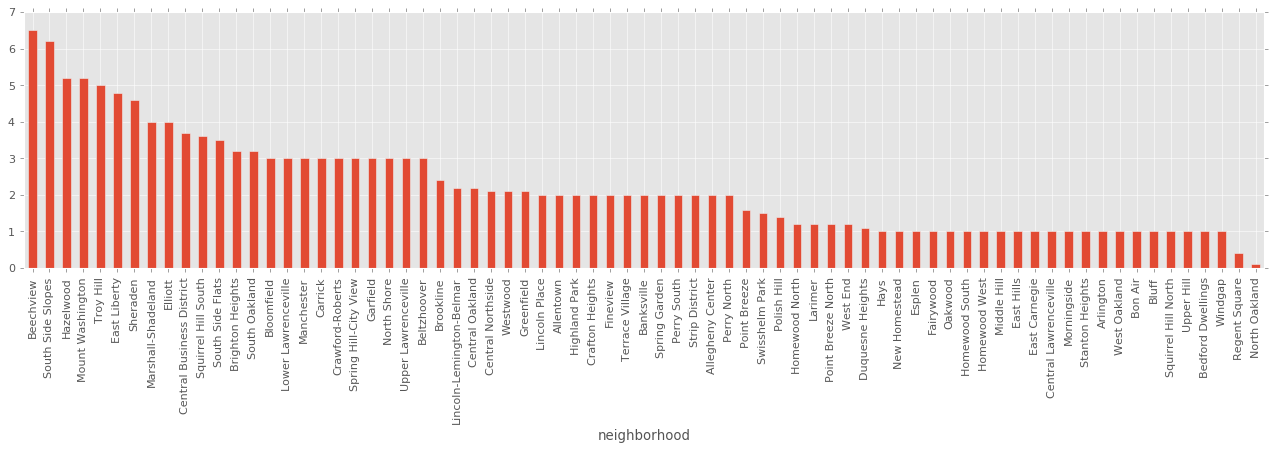

In [245]:
plt.style.use("ggplot")
parksDF["score"].plot.bar(figsize=(20,4))

In terms of having the most city parks, Beechview is clearly the winner. Now, I am no Pittsburgh local. In fact, it's only been three months since I landed in this silly country. Therefore, I don't even remember hearing the name `Beechview` until when I was doing this project. "Sorry, what was that? Beach view? Does Pittsburgh have beaches?" would've been my reaction. Clearly, I know nothing about this particular neighborhood, so I have no qualifying opinion on how good it actually is. Looking at online images though, I don't think it's half bad. Seems like an okay place to live, and looking at a map I do see how it might have the largest amount of city parks, even if their sizes all dwarf in comparison to good old Schenley or Frick. I will say I am slightly surprised, since I was not expecting a neighborhood with the land area of Beechview to have the largest amount of parks. I suppose I underestimated how small parks can get and still be listed on the **WPRDC.**
<br>
South Side Slopes is the runner-up here and might also have a good chance of winning. I seen this neighborhood exactly once from the roads of South Side Flats, so based on that alone I'd say it does look plenty green, though I'm not sure how much of the greenery are located in the parks.

#### **Police Arrests**

That sounds like no fun. Not only is it no fun being arrested, it is also no fun if arrests happen frequently around you, which would usually indicate a high crime rate or at least less safety compared to a nieghborhood with fewer arrests. Those then likely mean the neighborhood isn't the most well put-together. All of these significantly increase the likelihood that said beighborhood is one that would be depressing to live in. Thus, we conclude that the number of arrests in a given neighborhood positively correlates with how depressing it is. `More arrests = more depressing`. The data we are using covers only the last eight years (from 2016 onwards), so we needn't worry about outdated or irrelevant data due to age.

Let us read the file.

In [11]:
arrests = pd.read_csv("arrests.csv")
arrests.head(5)

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


That's a lot of depressing data. Let us filter out what we don't need.

In [12]:
    arrests[["OFFENSES", "ARRESTTIME", "INCIDENTNEIGHBORHOOD"]].head(5)

,OFFENSES,ARRESTTIME,INCIDENTNEIGHBORHOOD
0,3929 Retail Theft.,2016-08-24T12:20:00,Bloomfield
1,13(a)(16) Possession of Controlled Substance,2016-08-03T14:55:00,Outside City
2,3929 Retail Theft.,2016-08-03T16:45:00,Westwood
3,5503 Disorderly Conduct. / 5505 Public Drunken...,2016-08-05T02:36:00,East Allegheny
4,2702 Aggravated Assault. / 2705 Recklessy Enda...,2016-08-06T02:00:00,Crafton Heights


Now, we sort by `neighborhood` to count the number of arrets that occured in each. One easy way is to just count unique `ARRESTTIME` timestamps, since they appear to be accurate down to the minute, and it is extremely unlikely that two instances of arrest in the same neighborhood occur at exactly the same minute within the scope of this dataset.

In [18]:
arrests[["ARRESTTIME", "INCIDENTNEIGHBORHOOD"]].groupby("INCIDENTNEIGHBORHOOD").count()

,ARRESTTIME
INCIDENTNEIGHBORHOOD,
Allegheny Center,1244
Allegheny West,130
Allentown,947
Arlington,312
Arlington Heights,155
...,...
Upper Lawrenceville,189
West End,290
West Oakland,325


In [17]:
# weight by year

In [32]:
arrestsSeries = arrests[["ARRESTTIME", "INCIDENTNEIGHBORHOOD"]].groupby("INCIDENTNEIGHBORHOOD").count().loc[:, "ARRESTTIME"].sort_values(ascending=True)
arrestsSeries

INCIDENTNEIGHBORHOOD
Mt. Oliver Neighborhood         2
Troy Hill-Herrs Island          6
Mt. Oliver Boro                18
Central Northside              23
Ridgemont                      37
                             ... 
Homewood South               2090
East Allegheny               2217
Carrick                      2352
South Side Flats             3497
Central Business District    4440
Name: ARRESTTIME, Length: 98, dtype: int64

<Axes: xlabel='INCIDENTNEIGHBORHOOD'>

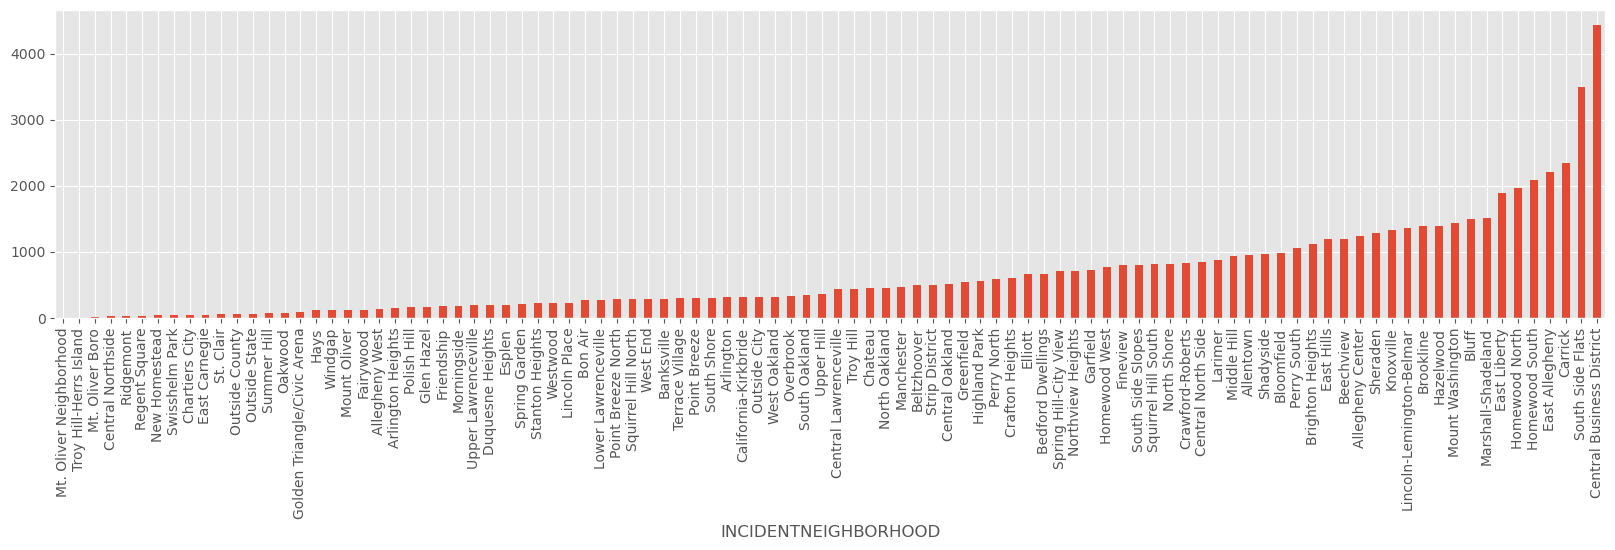

In [33]:
plt.style.use("ggplot")
arrestsSeries.plot.bar(figsize=(20,4))

Now we can clearly see that Downtown appears to be the worst neighborhood to live in by this metric. Not surprising, considering that downtowns are typically the most active parts of a city and that more crime typically is an inevitable part of that.
<br>
Plenty of neighborhoods seem to have very little arrests within the last eight years, and the one with the absolute least is none other than `Mt. Oliver`! Yeah, no, I have no idea where that is too. A quick glance at Google images tells me that it is your average Pittsburgh residential, mildly suburban chill neighborhood. I've got nothing else to go off of, so this is all I am really able to say. Congrats, Mt. Oliver, I guess.

#### **Community Center Attendance**

#### **Conclusion**

* Combine individual metrics into your final, overarching metric
* Name a neighborhood as “Best” according to your analysis